In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('Brasil.csv')
df.shape

(993, 67)

In [ ]:
df.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,...,17.9,NaN,2.2,75.88,765,215313504.0,NaN,NaN,NaN,NaN
1,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,17.9,NaN,2.2,75.88,765,215313504.0,NaN,NaN,NaN,NaN
2,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,17.9,NaN,2.2,75.88,765,215313504.0,NaN,NaN,NaN,NaN
3,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,...,17.9,NaN,2.2,75.88,765,215313504.0,2427.8,1.14,3.12,11.327592
4,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,...,17.9,NaN,2.2,75.88,765,215313504.0,NaN,NaN,NaN,NaN


In [ ]:
df.tail(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
988,BRA,South America,Brazil,2022-11-10,34889576.0,34084.0,6181143.0,688607.0,212.0,48571.0,...,17.9,NaN,2.2,75.88,765,215313504.0,NaN,NaN,NaN,NaN
989,BRA,South America,Brazil,2022-11-11,34908198.0,18622.0,8447857.0,688656.0,49.0,46286.0,...,17.9,NaN,2.2,75.88,765,215313504.0,NaN,NaN,NaN,NaN
990,BRA,South America,Brazil,2022-11-12,34908198.0,NaN,NaN,688656.0,NaN,NaN,...,17.9,NaN,2.2,75.88,765,215313504.0,NaN,NaN,NaN,NaN
991,BRA,South America,Brazil,2022-11-13,34908198.0,NaN,NaN,688656.0,NaN,NaN,...,17.9,NaN,2.2,75.88,765,215313504.0,NaN,NaN,NaN,NaN
992,BRA,South America,Brazil,2022-11-14,34908198.0,NaN,NaN,688656.0,NaN,NaN,...,17.9,NaN,2.2,75.88,765,215313504.0,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [ ]:
df.isnull().sum()

iso_code                                     0
continent                                    0
location                                     0
date                                         0
total_cases                                  0
                                          ... 
population                                   0
excess_mortality_cumulative_absolute       962
excess_mortality_cumulative                962
excess_mortality                           962
excess_mortality_cumulative_per_million    962
Length: 67, dtype: int64

In [ ]:
df.nunique()

iso_code                                     1
continent                                    1
location                                     1
date                                       993
total_cases                                922
                                          ... 
population                                   1
excess_mortality_cumulative_absolute        31
excess_mortality_cumulative                 31
excess_mortality                            31
excess_mortality_cumulative_per_million     31
Length: 67, dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,9.930000e+02,987.000000,9.820000e+02,973.000000,968.000000,9.620000e+02,9.930000e+02,9.870000e+02,982.000000,9.730000e+02,...,9.930000e+02,0.0,9.930000e+02,993.00,993.0,993.0,31.000000,31.000000,31.000000,31.000000
mean,1.712784e+07,35261.653495,2.982472e+07,419642.827338,711.507231,6.021169e+05,7.293344e+07,1.474278e+05,148428.404094,1.762890e+06,...,1.790000e+01,NaN,2.200000e+00,75.88,765.0,215313504.0,429032.280645,18.721935,22.627097,2001.772227
std,1.186115e+07,35033.988181,3.021748e+07,248354.164515,739.641967,6.615724e+05,5.774515e+07,1.646389e+05,141196.710444,1.249794e+06,...,7.109008e-15,NaN,8.886260e-16,0.00,0.0,0.0,292307.041639,7.780191,19.286697,1363.841706
min,1.000000e+00,0.000000,2.500000e+01,1.000000,0.000000,8.000000e+00,6.000000e-02,0.000000e+00,1.000000,7.000000e-02,...,1.790000e+01,NaN,2.200000e+00,75.88,765.0,215313504.0,2427.800000,1.140000,1.830000,11.327592
25%,5.537763e+06,11460.000000,6.608714e+06,165879.000000,174.750000,9.660675e+04,1.665751e+07,2.360750e+04,40943.250000,5.224940e+05,...,1.790000e+01,NaN,2.200000e+00,75.88,765.0,215313504.0,141881.350000,13.035000,10.190000,661.987824
50%,1.886381e+07,27024.000000,2.394814e+07,540733.000000,484.000000,3.756430e+05,7.350851e+07,1.068580e+05,124180.500000,2.151486e+06,...,1.790000e+01,NaN,2.200000e+00,75.88,765.0,215313504.0,504481.700000,22.310000,15.830000,2353.802969
75%,2.931323e+07,48986.000000,4.445971e+07,656231.000000,1031.000000,9.594642e+05,1.327796e+08,2.171950e+05,212945.750000,3.011869e+06,...,1.790000e+01,NaN,2.200000e+00,75.88,765.0,215313504.0,693006.750000,24.895000,29.385000,3233.420252
max,3.490820e+07,287149.000000,1.887854e+08,688656.000000,4148.000000,3.112286e+06,1.621273e+08,1.333632e+06,878844.000000,3.198387e+06,...,1.790000e+01,NaN,2.200000e+00,75.88,765.0,215313504.0,809562.200000,27.070000,83.180000,3777.242881


In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993 entries, 0 to 992
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   iso_code                                    993 non-null    object        
 1   continent                                   993 non-null    object        
 2   location                                    993 non-null    object        
 3   date                                        993 non-null    datetime64[ns]
 4   total_cases                                 993 non-null    float64       
 5   new_cases                                   987 non-null    float64       
 6   new_cases_smoothed                          982 non-null    float64       
 7   total_deaths                                973 non-null    float64       
 8   new_deaths                                  968 non-null    float64       
 9   new_deaths

In [ ]:
df.drop(
    ['iso_code', 'continent', 'location', 'new_cases', 'new_cases_smoothed', 'total_deaths',
     'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million',
     'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million',
     'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million',
     'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million',
     'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand',
     'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case',
     'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations',
     'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
     'total_boosters_per_hundred', 'new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundred',
     'stringency_index', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
     'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
     'life_expectancy', 'human_development_index', 'population', 'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative',
     'excess_mortality', 'excess_mortality_cumulative_per_million'],  
    inplace = True, axis=1)

In [ ]:
df.head(5)

,date,total_cases
0,2020-02-26,1.0
1,2020-02-27,1.0
2,2020-02-28,1.0
3,2020-02-29,2.0
4,2020-03-01,2.0


In [ ]:
df.tail(5)

,date,total_cases
988,2022-11-10,34889576.0
989,2022-11-11,34908198.0
990,2022-11-12,34908198.0
991,2022-11-13,34908198.0
992,2022-11-14,34908198.0


In [ ]:
df.columns

Index(['date', 'total_cases'], dtype='object')

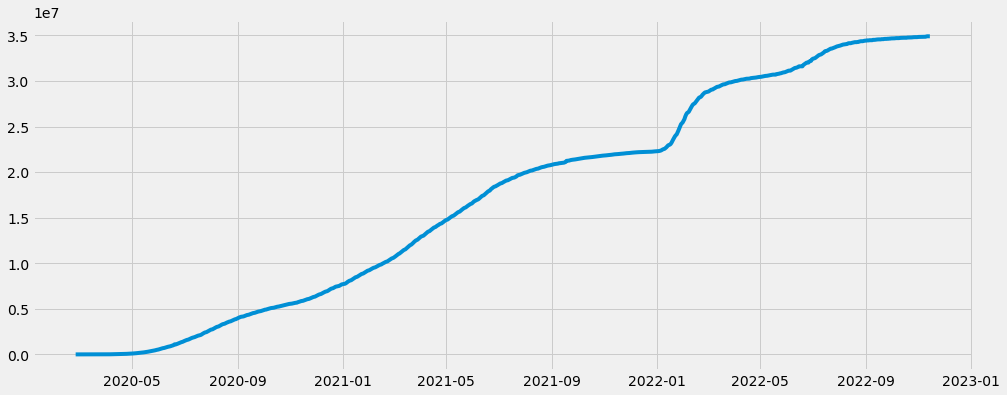

In [ ]:
date = df['date']
total_cases = df['total_cases']

fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(date, total_cases);

In [ ]:
df = df.set_index('date')
df.index = pd.to_datetime(df.index)

In [ ]:
arr = df.to_numpy()

In [ ]:
print(arr)

[[1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [2.0000000e+00]
 [2.0000000e+00]
 [2.0000000e+00]
 [2.0000000e+00]
 [4.0000000e+00]
 [4.0000000e+00]
 [1.3000000e+01]
 [1.3000000e+01]
 [2.0000000e+01]
 [2.5000000e+01]
 [3.1000000e+01]
 [3.8000000e+01]
 [5.2000000e+01]
 [1.5100000e+02]
 [1.5100000e+02]
 [1.6200000e+02]
 [2.0000000e+02]
 [3.2100000e+02]
 [3.7200000e+02]
 [6.2100000e+02]
 [7.9300000e+02]
 [1.0210000e+03]
 [1.5460000e+03]
 [1.9240000e+03]
 [2.2470000e+03]
 [2.5540000e+03]
 [2.9850000e+03]
 [3.4170000e+03]
 [3.9040000e+03]
 [4.2560000e+03]
 [4.5790000e+03]
 [5.7170000e+03]
 [6.8360000e+03]
 [8.0440000e+03]
 [9.0560000e+03]
 [1.0360000e+04]
 [1.1130000e+04]
 [1.2161000e+04]
 [1.4034000e+04]
 [1.6170000e+04]
 [1.8092000e+04]
 [1.9638000e+04]
 [2.0727000e+04]
 [2.2192000e+04]
 [2.3430000e+04]
 [2.5262000e+04]
 [2.8320000e+04]
 [3.0425000e+04]
 [3.3682000e+04]
 [3.6658000e+04]
 [3.8654000e+04]
 [4.0743000e+04]
 [4.3079000e+04]
 [4.5757000e+04]
 [5.0036000e+04]
 [5.4043000e+0

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

train ,test = train_test_split(df,test_size=0.3)

In [ ]:
print(train)

            total_cases
date                   
2021-08-13   20325289.0
2022-02-24   28589235.0
2021-12-29   22269031.0
2022-08-22   34284864.0
2021-02-03    9347703.0
...                 ...
2022-04-07   30095328.0
2022-03-16   29488777.0
2022-08-26   34368909.0
2022-11-05   34849063.0
2022-07-16   33290266.0

[695 rows x 1 columns]


In [ ]:
print(test)

            total_cases
date                   
2022-04-06   30069094.0
2020-09-24    4663930.0
2022-01-03   22309081.0
2021-03-03   10731070.0
2020-07-10    1809371.0
...                 ...
2022-01-19   23425392.0
2021-05-23   16093784.0
2022-02-27   28776794.0
2021-07-13   19161644.0
2021-01-05    7819636.0

[298 rows x 1 columns]


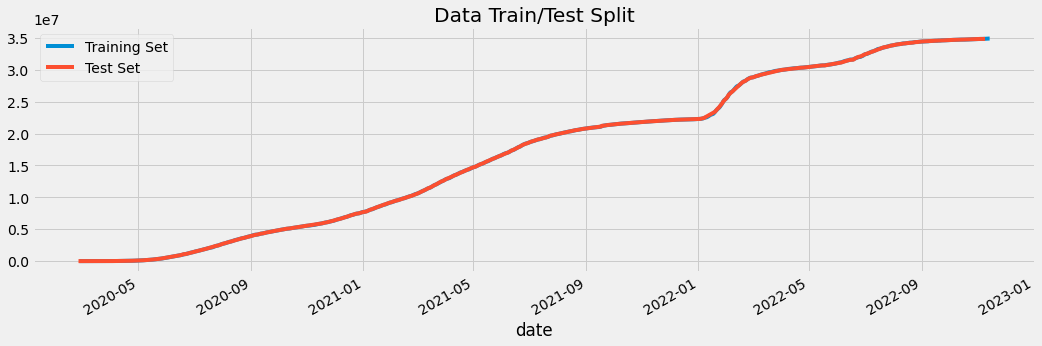

In [ ]:
# train = df.loc[df.index < '2022-06-01']
# test = df.loc[df.index >= '2022-06-01']

fig, ax = plt.subplots(figsize=(16, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
#ax.axvline('2022-01-01', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [ ]:
def create_features(df):

    df = df.copy()
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)

In [ ]:
train = create_features(train)
test = create_features(test)

FEATURES = ['dayofyear', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'total_cases'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [ ]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[15:53:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:2.10534e+07	validation_1-rmse:1.95907e+07
[100]	validation_0-rmse:7.86131e+06	validation_1-rmse:7.30758e+06
[200]	validation_0-rmse:2.97886e+06	validation_1-rmse:2.74633e+06
[300]	validation_0-rmse:1.16789e+06	validation_1-rmse:1.07456e+06
[400]	validation_0-rmse:480770	validation_1-rmse:450297
[500]	validation_0-rmse:210443	validation_1-rmse:212472
[600]	validation_0-rmse:99108.5	validation_1-rmse:120738
[700]	validation_0-rmse:52514.7	validation_1-rmse:85561.7
[800]	validation_0-rmse:33609.6	validation_1-rmse:71105.2
[900]	validation_0-rmse:26588.2	validation_1-rmse:65783
[999]	validation_0-rmse:23643.7	validation_1-rmse:63613.8


XGBRegressor(early_stopping_rounds=50, learning_rate=0.01, n_estimators=1000)

In [ ]:
reg.feature_importances_

array([3.4380406e-02, 5.4480063e-07, 2.5340304e-02, 1.9095885e-04,
       9.4008774e-01], dtype=float32)

In [ ]:
reg.best_params_

AttributeError: ignored

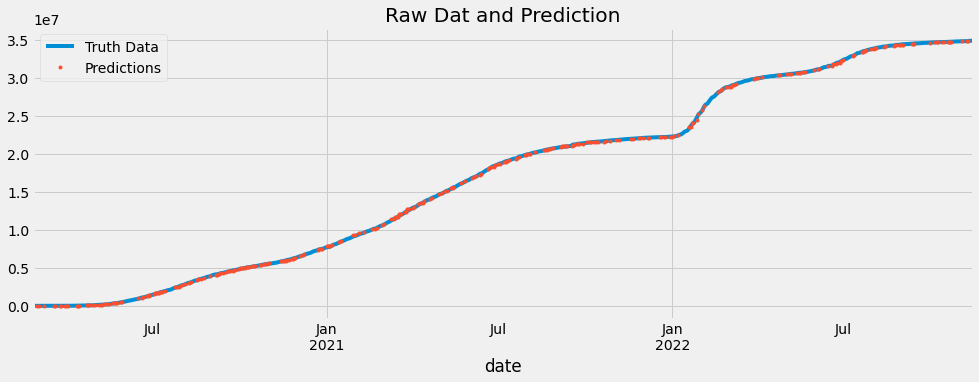

In [ ]:
test['prediction'] = reg.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['total_cases']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()


In [ ]:
score = np.sqrt(mean_squared_error(test['total_cases'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 63613.79


In [ ]:
predictions = reg.predict(X_test)
predictions

array([3.00875520e+07, 4.64235500e+06, 2.23485900e+07, 1.07503800e+07,
       1.87220475e+06, 4.74902750e+06, 3.43426160e+07, 5.95126200e+06,
       1.37673012e+06, 5.03588450e+06, 1.63782625e+06, 1.33897240e+07,
       2.15990060e+07, 2.73690100e+06, 5.25472938e+05, 2.12683800e+07,
       3.34737900e+06, 2.10501040e+07, 1.83116720e+07, 2.06818720e+07,
       3.41331800e+07, 1.71325620e+07, 2.62881500e+07, 2.98830580e+07,
       7.84751750e+06, 2.17028438e+05, 9.13888594e+04, 3.46956100e+06,
       3.15322051e+04, 5.21510050e+06, 1.48663820e+07, 2.20673700e+07,
       9.29160800e+06, 4.96248750e+06, 3.44096520e+07, 2.18312900e+07,
       2.25015200e+07, 9.70711200e+06, 2.88841720e+07, 1.04974938e+06,
       4.52545150e+06, 1.07848340e+04, 2.22048500e+07, 1.28631825e+06,
       6.04838950e+06, 1.72918660e+07, 1.03030360e+07, 1.07848340e+04,
       3.59065100e+06, 1.63782625e+06, 3.46560520e+07, 2.21299900e+07,
       3.43432640e+07, 1.00679140e+07, 2.90326620e+07, 2.21299900e+07,
      

In [ ]:
predicted_values = [1.59679078e+05, 4.74902750e+06, 2.86003900e+07, 3.48732080e+07,
       8.43747200e+06, 2.44975141e+05, 2.22328640e+07, 3.45443080e+07,
       5.03407250e+06, 3.04711440e+07, 1.07848340e+04, 2.07222060e+07,
       7.45204900e+06, 1.16464060e+07, 3.38501480e+07, 3.05509680e+07,
       1.56406100e+07, 1.71714766e+05, 3.06883840e+07, 3.07399050e+06,
       2.21933400e+07, 7.92567300e+06, 2.21933400e+07, 3.18947860e+07,
       2.21058620e+07, 2.35707020e+07, 1.61347660e+07, 2.87800200e+07,
       1.92315920e+07, 7.92567300e+06]

AttributeError: ignored

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

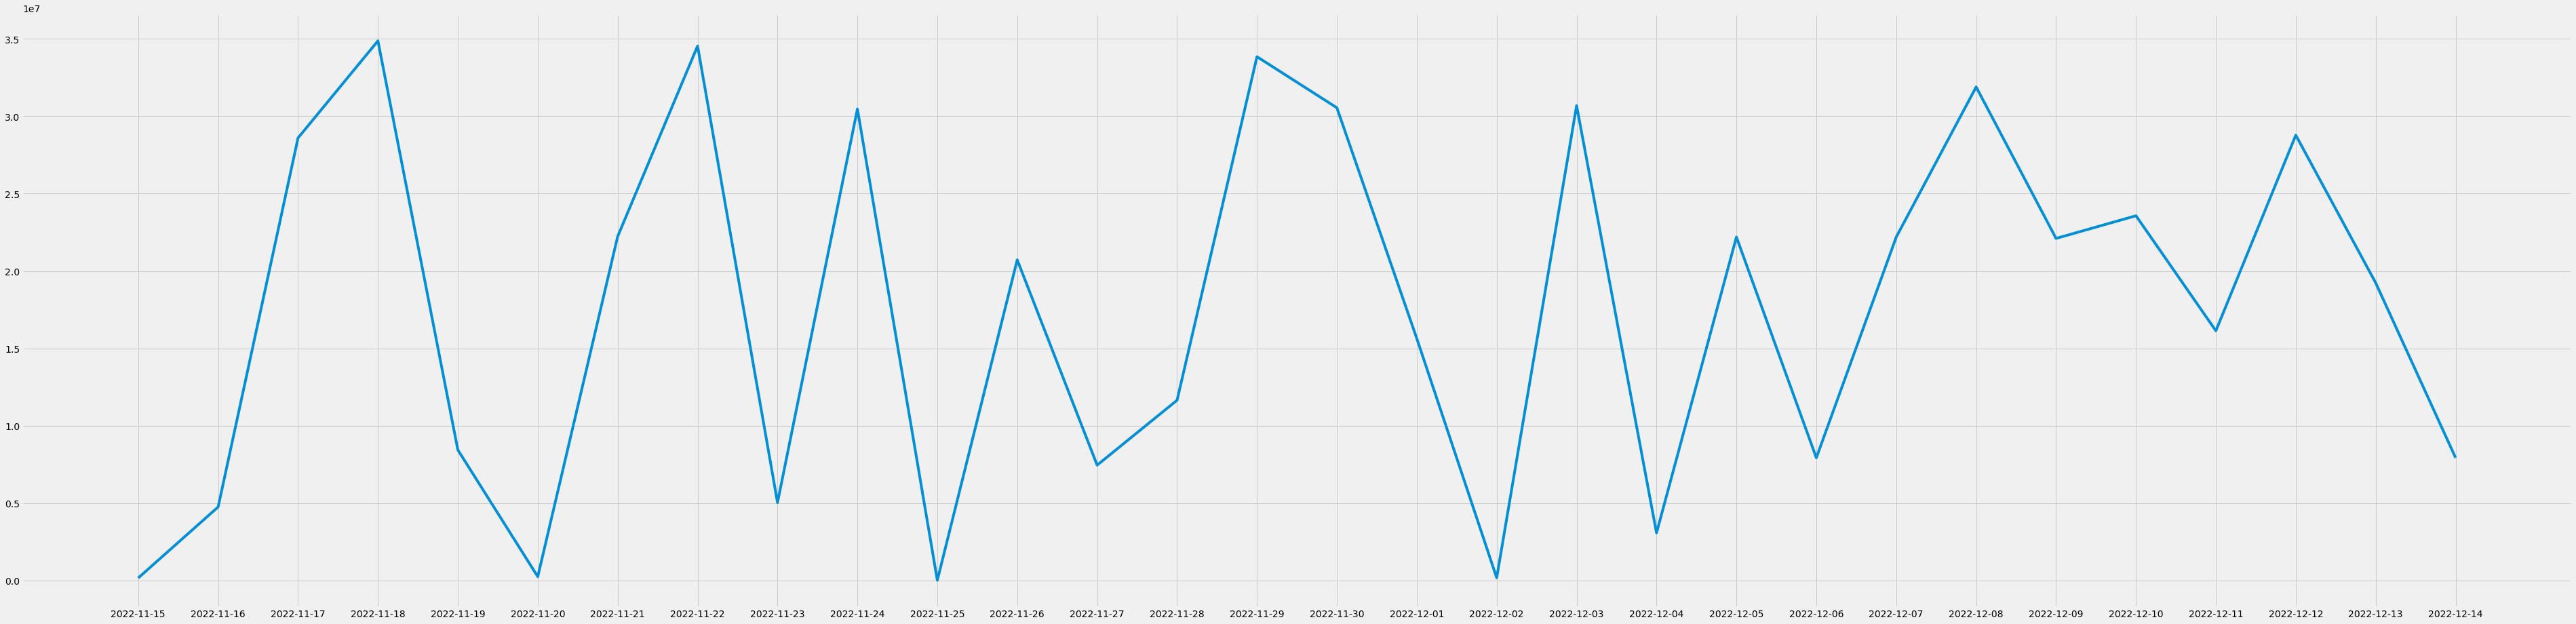

In [ ]:
y = [1.59679078e+05, 4.74902750e+06, 2.86003900e+07, 3.48732080e+07, 8.43747200e+06, 2.44975141e+05, 
          2.22328640e+07, 3.45443080e+07,5.03407250e+06, 3.04711440e+07, 1.07848340e+04, 2.07222060e+07,
          7.45204900e+06, 1.16464060e+07, 3.38501480e+07, 3.05509680e+07, 1.56406100e+07, 1.71714766e+05, 
          3.06883840e+07, 3.07399050e+06, 2.21933400e+07, 7.92567300e+06, 2.21933400e+07, 3.18947860e+07,
          2.21058620e+07, 2.35707020e+07, 1.61347660e+07, 2.87800200e+07, 1.92315920e+07, 7.92567300e+06]

x = ['2022-11-15', '2022-11-16', '2022-11-17', '2022-11-18', '2022-11-19', '2022-11-20', '2022-11-21',
          '2022-11-22', '2022-11-23', '2022-11-24', '2022-11-25', '2022-11-26', '2022-11-27', '2022-11-28',
          '2022-11-29', '2022-11-30', '2022-12-01', '2022-12-02', '2022-12-03', '2022-12-04', '2022-12-05',
          '2022-12-06', '2022-12-07', '2022-12-08', '2022-12-09', '2022-12-10', '2022-12-11', '2022-12-12',
          '2022-12-13', '2022-12-14']

fig, ax = plt.subplots(figsize=(60, 15))
plt.plot(x, y)
plt.show()